# <h1>Coffea <h1>

## Nanoevents

- Different "Schemas" interpret our root files for our convinience.
- NanoAODSchema is used for CMS NanoAOD format
- NanoEventsFactory creates "NanoEvent" objects which are accessed in a "Lazy" fashion

In [36]:
import awkward as ak
import numpy as np
import hist 
from matplotlib.pyplot import plot as plt
from coffea.nanoevents import NanoEventsFactory , NanoAODSchema
file_name = "../Data/nano_dy.root"
events = NanoEventsFactory.from_root(file_name, schemaclass=NanoAODSchema.v6, metadata={"Datasets":"DYJets"},).events()

In [37]:
events

<NanoEventsArray [<event 1:13889:3749778>, ... ] type='40 * event'>

- Note that this is a NanoEventsArray object , not a uproot.TTree object. It does inherit from uproot.TTree though. NanoAODSchema wraps our arrays to have special and easy to understand methods.

In [38]:
ak.type(events)

40 * event

In [39]:
events.fields

['luminosityBlock',
 'GenJetAK8',
 'LHEReweightingWeight',
 'Pileup',
 'SoftActivityJet',
 'GenMET',
 'Generator',
 'LHE',
 'SoftActivityJetHT5',
 'PSWeight',
 'genTtbarId',
 'SV',
 'GenVisTau',
 'PV',
 'fixedGridRhoFastjetCentralNeutral',
 'MET',
 'Jet',
 'IsoTrack',
 'SoftActivityJetNjets2',
 'LHEPdfWeight',
 'PuppiMET',
 'SoftActivityJetNjets10',
 'fixedGridRhoFastjetCentral',
 'CaloMET',
 'SubGenJetAK8',
 'SubJet',
 'event',
 'GenJet',
 'SoftActivityJetHT10',
 'TrigObj',
 'run',
 'Electron',
 'ChsMET',
 'OtherPV',
 'Photon',
 'fixedGridRhoFastjetCentralChargedPileUp',
 'Tau',
 'GenPart',
 'HTXS',
 'genWeight',
 'FatJet',
 'LHEPart',
 'LHEScaleWeight',
 'HLTriggerFirstPath',
 'fixedGridRhoFastjetCentralCalo',
 'L1Reco',
 'Muon',
 'RawMET',
 'L1',
 'L1simulation',
 'GenDressedLepton',
 'FsrPhoton',
 'SoftActivityJetHT2',
 'HLTriggerFinalPath',
 'Flag',
 'SoftActivityJetHT',
 'LHEWeight',
 'SoftActivityJetNjets5',
 'btagWeight',
 'fixedGridRhoFastjetAll',
 'CorrT1METJet',
 'HLT',
 'Tk

- Most of these fields have their own subfields. Coffea has already grouped this information for us. These groups are called collections.
- `events` as a whole is an awkward array consisting of record objects.
- Each record object stores one collection.

In [40]:
events["Electron"]

<ElectronArray [[], [Electron], ... [], []] type='40 * var * electron'>

In [41]:
events["Electron"].fields

['deltaEtaSC',
 'dr03EcalRecHitSumEt',
 'dr03HcalDepth1TowerSumEt',
 'dr03TkSumPt',
 'dr03TkSumPtHEEP',
 'dxy',
 'dxyErr',
 'dz',
 'dzErr',
 'eCorr',
 'eInvMinusPInv',
 'energyErr',
 'eta',
 'hoe',
 'ip3d',
 'jetPtRelv2',
 'jetRelIso',
 'mass',
 'miniPFRelIso_all',
 'miniPFRelIso_chg',
 'mvaFall17V1Iso',
 'mvaFall17V1noIso',
 'mvaFall17V2Iso',
 'mvaFall17V2noIso',
 'pfRelIso03_all',
 'pfRelIso03_chg',
 'phi',
 'pt',
 'r9',
 'sieie',
 'sip3d',
 'mvaTTH',
 'charge',
 'cutBased',
 'cutBased_Fall17_V1',
 'jetIdx',
 'pdgId',
 'photonIdx',
 'tightCharge',
 'vidNestedWPBitmap',
 'vidNestedWPBitmapHEEP',
 'convVeto',
 'cutBased_HEEP',
 'isPFcand',
 'lostHits',
 'mvaFall17V1Iso_WP80',
 'mvaFall17V1Iso_WP90',
 'mvaFall17V1Iso_WPL',
 'mvaFall17V1noIso_WP80',
 'mvaFall17V1noIso_WP90',
 'mvaFall17V1noIso_WPL',
 'mvaFall17V2Iso_WP80',
 'mvaFall17V2Iso_WP90',
 'mvaFall17V2Iso_WPL',
 'mvaFall17V2noIso_WP80',
 'mvaFall17V2noIso_WP90',
 'mvaFall17V2noIso_WPL',
 'seedGain',
 'genPartIdx',
 'genPartFlav',

In [42]:
events["Generator"].fields

['binvar', 'scalePDF', 'weight', 'x1', 'x2', 'xpdf1', 'xpdf2', 'id1', 'id2']

In [43]:
events.Generator.fields

['binvar', 'scalePDF', 'weight', 'x1', 'x2', 'xpdf1', 'xpdf2', 'id1', 'id2']

- ? gives the help info

In [44]:
events.Generator.fields?

Type:        property
String form: <property object at 0x7f949ba15590>
Docstring:  
List of field names or tuple slot numbers (as strings) of the outermost
record or tuple in this array.

If the array contains nested records, only the fields of the outermost
record are shown. If it contains tuples instead of records, its fields
are string representations of integers, such as `"0"`, `"1"`, `"2"`, etc.
The records or tuples may be within multiple layers of nested lists.

If the array contains neither tuples nor records, it is an empty list.

See also #ak.fields.

In [45]:
events.Generator.scalePDF

<Array [95.4, 54.4, 74.8, ... 89.4, 33.9, 92.2] type='40 * float32[parameters={"...'>

- Unlike Uproot where we have to use the method `title` to get the autodocumentation of a branch , we can directly use the `__doc__` method here.
Note that the usual `title` won't work here.

In [46]:
events.Generator.scalePDF.__doc__

'Q2 scale for PDF'

In [47]:
#events.Generator.scalePDF.title

In [48]:
h = hist.Hist.new.Reg(10,0,100).Double()
h.fill(events.Generator.scalePDF) #Here events.Generator.scalePDF was already flat
h

Hist(Regular(10, 0, 100, label='Axis 0'), storage=Double()) # Sum: 40.0

- Based on the collections, some collections have extra methods.
- For example, some collection can utilise the Lorentz vector methods

In [49]:
events.Electron.px #px is not one of the fields 

<Array [[], [-28.9], ... -3.63], [], []] type='40 * var * float32'>

- We can also cast to a Momentum4D object 

In [50]:
ak.with_name(events.Electron , "PtEtaPhiMLorentzVector")

<PtEtaPhiMLorentzVectorArray [[], [{deltaEtaSC: -0.0145, ... [], []] type='40 * ...'>

In [51]:
ak.with_name(events.Electron , "PtEtaPhiMLorentzVector").energy

<Array [[], [94.7], [62.7, ... [8.24], [], []] type='40 * var * float32'>

In [52]:
events.Electron #Lazily accessed

<ElectronArray [[], [Electron], ... [], []] type='40 * var * electron'>

In [53]:
print(events.Electron) #Lazily accessed

[[], [Electron], [Electron, Electron], [Electron, ... [], [Electron], [], []]


In [54]:
ele = events.Electron
print(ele)
print(ak.num(ele))
ele = events.Electron[ak.num(ele) > 0] # to eliminate empty arrays
print(ele)
print(ak.num(ele))
print(ele[:,0].pt) # the leading orders
hist.Hist.new.Reg(10,0,200).Double().fill(ele[:,0].pt)
ak.firsts(events.Electron.pt) # This too gives leading order but with None types for empty arrays

[[], [Electron], [Electron, Electron], [Electron, ... [], [Electron], [], []]
[0, 1, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, ... 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0]
[[Electron], [Electron, Electron], [Electron, ... [Electron], [Electron], [Electron]]
[1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]
[29.6, 60.1, 10.7, 9.91, 33.2, 39.8, 6.79, ... 23.1, 27, 28.6, 36.3, 15.6, 7.68]


<Array [None, 29.6, 60.1, ... 7.68, None, None] type='40 * ?float32[parameters={...'>

In [55]:
#delta r between all electrons and leading jets
events.Jet[:,0].delta_r(events.Electron) #note that jets are plenty and hence they have no empty arrays

<Array [[], [3.13], [3.45, ... 0.0858], [], []] type='40 * var * float32'>

In [56]:
# Cartesian is useful for such calculations
print(events.Electron[2])
print(events.Jet[2])
comb = ak.cartesian([events.Jet , events.Electron])
print([str(i) for i in comb[2]])
j , e = ak.unzip(comb)
j.delta_r(e)

[Electron, Electron]
[Jet, Jet, Jet, Jet, Jet]
['(Jet, Electron)', '(Jet, Electron)', '(Jet, Electron)', '(Jet, Electron)', '(Jet, Electron)', '(Jet, Electron)', '(Jet, Electron)', '(Jet, Electron)', '(Jet, Electron)', '(Jet, Electron)']


<Array [[], [3.13, 0.0257, 1.21, ... [], []] type='40 * var * float32'>

In [57]:
# a short hand to do the same is by assigning keys
jet_ele_pairs = ak.cartesian({"jet": events.Jet , "ele": events.Electron })
jet_ele_pairs.jet.delta_r(jet_ele_pairs.ele)

<Array [[], [3.13, 0.0257, 1.21, ... [], []] type='40 * var * float32'>

In [58]:
# to directly get the pair with smallest delta_r ,i.e., the nearest electron to jet
near = events.Jet.nearest(events.Electron)
print(near)
print(near[1]) #same electron repeated all over
print(near[1].pt)
#this preserves the size as expected from a cartesian product

[[None, None, None, None, None], [Electron, ... None, None, None], [None, None]]
[Electron, Electron, Electron, Electron, Electron, Electron, Electron, Electron]
[29.6, 29.6, 29.6, 29.6, 29.6, 29.6, 29.6, 29.6]


In [59]:
#using the minimum function
a = ak.Array([[  1,2,3 ],[  42,4,5,6  ]])
ak.min(a) # This will flatten and find the minimum element

1

In [60]:
ak.min(a, axis = 0) # This will find minimum columnwise

<Array [1, 2, 3, 6] type='4 * ?int64'>

In [61]:
ak.min(a,axis = 1) # This will find minimum in each subarray with depth level  1

<Array [1, 4] type='2 * ?int64'>

In [62]:
# getting position of the minimum is sometimes more fruitful
print(ak.argmin(a, axis= 1))

[0, 1]


In [63]:
#identification flags have new methods built by NanoEvents
print(events.Jet.jetId)
print(events.Jet.jetId.__doc__)
print(events.Jet.isTight)

[[6, 6, 6, 6, 6], [6, 2, 6, 6, 6, 6, 6, 0], ... 6], [6], [6, 6, 0, 6, 6, 6], [6, 6]]
Jet ID flags bit1 is loose (always false in 2017 since it does not exist), bit2 is tight, bit3 is tightLepVeto
[[True, True, True, True, True], [True, ... False, True, True, True], [True, True]]


In [64]:
print(events.Electron.cutBased)
print(events.Electron.cutBased.__doc__)
print(events.Electron.isTight)

[[], [4], [3, 4], [1, 0], [], [0], [0], ... 4], [], [4], [], [4], [], [0], [], []]
cut-based ID Fall17 V2 (0:fail, 1:veto, 2:loose, 3:medium, 4:tight)
[[], [True], [False, True], [False, False], [], ... [], [True], [], [False], [], []]


In [65]:
events.GenPart

<GenParticleArray [[GenParticle, ... GenParticle]] type='40 * var * genParticle'>

In [66]:
events.GenPart.fields

['eta',
 'mass',
 'phi',
 'pt',
 'genPartIdxMother',
 'pdgId',
 'status',
 'statusFlags',
 'genPartIdxMotherG',
 'distinctParentIdxG',
 'childrenIdxG',
 'distinctChildrenIdxG',
 'distinctChildrenDeepIdxG']

In [67]:
events.GenPart.statusFlags.__doc__

'gen status flags stored bitwise, bits are: 0 : isPrompt, 1 : isDecayedLeptonHadron, 2 : isTauDecayProduct, 3 : isPromptTauDecayProduct, 4 : isDirectTauDecayProduct, 5 : isDirectPromptTauDecayProduct, 6 : isDirectHadronDecayProduct, 7 : isHardProcess, 8 : fromHardProcess, 9 : isHardProcessTauDecayProduct, 10 : isDirectHardProcessTauDecayProduct, 11 : fromHardProcessBeforeFSR, 12 : isFirstCopy, 13 : isLastCopy, 14 : isLastCopyBeforeFSR, '

In [68]:
#We can also access the flags and do our required opearation
events.GenPart.hasFlags(["isPrompt","isLastCopy"])

<Array [[True, True, False, ... False, False]] type='40 * var * bool'>

- Nanoevents has precomputed cross references to match the true particle with the signal data.
- pgdIds are used to infer which particles we are talking about
- `events.Electron.matched_gen.pdgId`creates an array of cross links
- 11 means an electron is matched to an electron
- \- 11 means a positron is matched to a positron
- 22 means a photon is matched to an electron
- None means that the identified electron is fake

In [69]:
import particle
particle.Particle.from_pdgid(23)

<Particle: name="Z0", pdgid=23, mass=91187.6 ± 2.1 MeV>

In [70]:
print(events.Electron.charge)
match = events.Electron.matched_gen.pdgId
print(match)

[[], [1], [1, -1], [1, 1], [], [1], [1], ... [], [-1], [], [1], [], [-1], [], []]
[[], [-11], [-11, 11], [22, None], [], [None, ... 11], [], [-11], [], [None], [], []]


- The parent index gives you the info about what particle is the "Parent" particle of this particle

In [71]:
parents = events.GenPart.parent.pdgId
parents

<Array [[None, None, 1, 1, ... 111, 111, 111]] type='40 * var * ?int32[parameter...'>

In [72]:
parents = events.GenPart[events.GenPart.pdgId == 11].parent.pdgId

In [73]:
def show_info(parent):
    return [[particle.Particle.from_pdgid(element) for element in particles] for particles in parent]
show_info(parents[:3])

[[],
 [<Particle: name="Z0", pdgid=23, mass=91187.6 ± 2.1 MeV>,
  <Particle: name="e-", pdgid=11, mass=0.51099895000 ± 0.00000000015 MeV>],
 [<Particle: name="Z0", pdgid=23, mass=91187.6 ± 2.1 MeV>,
  <Particle: name="e-", pdgid=11, mass=0.51099895000 ± 0.00000000015 MeV>]]

- We can also know what are the children of parents

In [74]:
child = events.GenPart.parent.children.pdgId
child

<Array [[None, None, [23, 21, ... [22, 22]]] type='40 * var * option[var * ?int3...'>

In [75]:
part = ak.flatten(child) # child is doubly nested
part = part[~ak.is_none(part)] # to remove none types
show_info(part[:3])

[[<Particle: name="Z0", pdgid=23, mass=91187.6 ± 2.1 MeV>,
  <Particle: name="g", pdgid=21, mass=0.0 MeV>],
 [<Particle: name="Z0", pdgid=23, mass=91187.6 ± 2.1 MeV>,
  <Particle: name="g", pdgid=21, mass=0.0 MeV>],
 [<Particle: name="Z0", pdgid=23, mass=91187.6 ± 2.1 MeV>]]

In [76]:
print(events.GenPart[(abs(events.GenPart.pdgId) == 11)])

[[], [GenParticle, GenParticle, GenParticle, ... GenParticle, GenParticle], []]


In [77]:
A = events.GenPart[
    (abs(events.GenPart.pdgId) == 11)
    & events.GenPart.hasFlags(['isPrompt','isLastCopy'])].distinctParent.pdgId
print(A)

[[], [23, 23], [23, 23], [], [], [], [], ... [23, 23], [], [], [], [], [23, 23], []]


In [78]:
 a = events.GenPart[
    (abs(events.GenPart.pdgId) == 11)
    & events.GenPart.hasFlags(['isPrompt', 'isLastCopy'])].parent.pdgId
print(a)

[[], [11, -11], [11, -11], [], [], [], ... -11], [], [], [], [], [-11, 11], []]


In [79]:
A[-7]

<Array [23, 23] type='2 * ?int32[parameters={"__doc__": "PDG id"}]'>

In [80]:
a[-7]

<Array [11, -11] type='2 * ?int32[parameters={"__doc__": "PDG id"}]'>

In [81]:
#dimuon events
mmevents = events[ak.num(events.Muon) == 2]
zmm = mmevents.Muon[:,0] + mmevents.Muon[:,1]
zmm.mass

<Array [94.6, 87.6, 88, 90.4, 89.1, 31.6] type='6 * float32'>

In [82]:
#hist.Hist.new.Reg(100,0,100).Double().fill(zmm.mass)

In [83]:
# A shorter method to do the same
mmevents.Muon.sum(axis = 1).mass

<Array [94.6, 87.6, 88, 90.4, 89.1, 31.6] type='6 * float32'>

In [84]:
# To add your own variables
mmevents["Electron", "myvariable"] = mmevents.Electron.pt + zmm.mass
mmevents.Electron.myvariable

<Array [[], [121], [], [], [], []] type='6 * var * float32'>

## Applying corrections

In [85]:
events

<NanoEventsArray [<event 1:13889:3749778>, ... ] type='40 * event'>

### Coffea lookup_tools

In [86]:
from coffea.lookup_tools import extractor

In [87]:
%%bash
echo "Hello World"

Hello World


In [124]:
# %%bash
# mkdir -p data
# pushd data
# PREFIX=https://raw.githubusercontent.com/CoffeaTeam/coffea/master/tests/samples
# curl -Os $PREFIX/testSF2d.histo.root
# curl -Os $PREFIX/Fall17_17Nov2017_V32_MC_L2Relative_AK4PFPuppi.jec.txt
# curl -Os $PREFIX/Fall17_17Nov2017_V32_MC_Uncertainty_AK4PFPuppi.junc.txt
# curl -Os $PREFIX/DeepCSV_102XSF_V1.btag.csv.gz
# popd

#### Opening a root file and Using it as a lookup table

In [125]:
import uproot as ur
file = ur.open("data/testSF2d.histo.root")
print(file.keys())
sc = file["scalefactors_Tight_Electron"]
sc

['scalefactors_Tight_Electron;1']


<TH2F (version 3) at 0x7f947096caf0>

<img title="scalefactors_Tight_Electron" alt="sc" src="data/Canvas.png">

- The extractor class facilitates the use of coffea lookup_tools
- The extractor class can take in many histograms at once(using wildcards *), here we only need one.
- The evaluator is applies our corrections

In [126]:
ex = extractor()
ex

The usual syntax to add the weights is `ex.add_weight_sets(["<Define a key><space><specify the histogram object name><space><the file>"])`

In [127]:
ex.add_weight_sets(["testSF2d scalefactors_Tight_Electron data/testSF2d.histo.root"])

In [128]:
ex.finalize() # to stop further imports or modifications

In [129]:
evaluator = ex.make_evaluator()
evaluator.keys()

dict_keys(['testSF2d'])

In [130]:
evaluator["testSF2d"]

2 dimensional histogram with axes:
	1: [-2.5   -2.    -1.566 -1.444 -0.8    0.     0.8    1.444  1.566  2.
  2.5  ]
	2: [ 10.  20.  35.  50.  90. 150. 500.]

In [131]:
type(evaluator["testSF2d"])

coffea.lookup_tools.dense_lookup.dense_lookup

- Pass your branches as an argument to this to get the scale factor
- for our case, scale factor depended upon eta(x-axis) and pt(y-axis)
- The resultant scale factor has same size as Electron and has info about what should be the scale factor for each electron depending upon it's eta and pt.

In [132]:
print("Electron eta:", events.Electron.eta)
print("Electron pt:", events.Electron.pt)
scale = evaluator["testSF2d"](events.Electron.eta, events.Electron.pt)
print("Scale factor:", scale)

Electron eta: [[], [1.83], [-0.293, -0.904], [-2.19, 1.65], ... [-0.0595], [], [0.381], [], []]
Electron pt: [[], [29.6], [60.1, 51.7], [10.7, 8.6], [], ... [], [15.6], [], [7.68], [], []]
Scale factor: [[], [0.909], [0.953, 0.972], [0.807, 0.827], ... [0.941], [], [0.946], [], []]


In [133]:
import hist
h = hist.Hist.new.Reg(100,0,100).Double()
h.fill(ak.flatten(events.Electron.E * scale))
h

Hist(Regular(100, 0, 100, label='Axis 0'), storage=Double()) # Sum: 21.0 (25.0 with flow)

#### Buiding and using your own corrections from a histogram

- Lets first construct two different data sets of eta and phi.
- These two datasets may correspond to, for example, from two different generators

In [134]:
import matplotlib.pyplot as plt
import numpy as np

In [135]:
h = hist.Hist.new.StrCat(["gen1", "gen2", "gen2rwt"], name="dataset") #StringCategory Histogram
h

ConstructProxy(Hist, StrCategory(['gen1', 'gen2', 'gen2rwt'], name='dataset'))

In [136]:
h= h.Reg(20, 0, 100 , name = "pt") # adding the pt axis

In [137]:
h= h.Reg(4, -3, 3, name="eta") # adding the eta axis

In [138]:
h = h.Weight()
h

Hist(
  StrCategory(['gen1', 'gen2', 'gen2rwt'], name='dataset'),
  Regular(20, 0, 100, name='pt'),
  Regular(4, -3, 3, name='eta'),
  storage=Weight()) # Sum: WeightedSum(value=0, variance=0)

- Now lets fill this histogram object with random data

In [139]:
h.fill(dataset="gen1",
        pt=np.random.exponential(scale=10.0, size=10000) + np.random.exponential(scale=10.0, size=10000),
        eta=np.random.normal(scale=1, size=10000)
      )
h.fill(dataset="gen2",
       pt=np.random.exponential(scale=10.0, size=10000) + np.random.exponential(scale=15.0, size=10000),
       eta=np.random.normal(scale=1.1, size=10000)
      )

Hist(
  StrCategory(['gen1', 'gen2', 'gen2rwt'], name='dataset'),
  Regular(20, 0, 100, name='pt'),
  Regular(4, -3, 3, name='eta'),
  storage=Weight()) # Sum: WeightedSum(value=19887, variance=19887) (WeightedSum(value=20000, variance=20000) with flow)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f9091a95580>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f9091289550>, text=[])

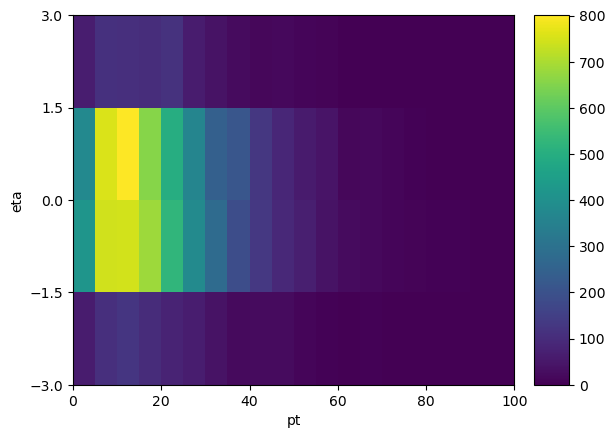

In [140]:
h["gen1",:,:].plot2d() #first 2d histogram

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f90911b6c10>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f909115aee0>, text=[])

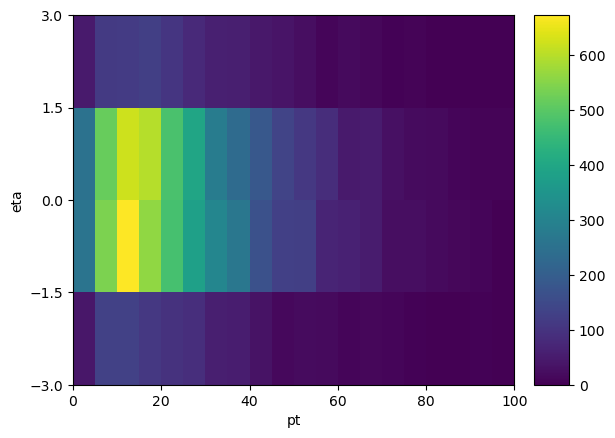

In [141]:
h["gen2",:,:].plot2d() #second 2d histogram (to be corrected)

In [142]:
h["gen2rwt",:,:] #third 2d histogram (not yet filled)

Hist(
  Regular(20, 0, 100, name='pt'),
  Regular(4, -3, 3, name='eta'),
  storage=Weight()) # Sum: WeightedSum(value=0, variance=0)

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


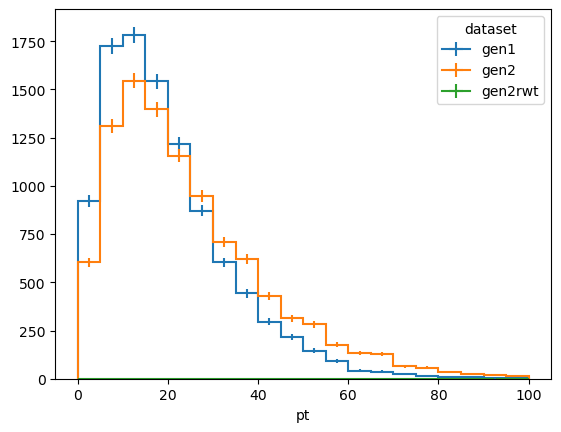

In [143]:
fig, ax= plt.subplots()
h[:,:,sum].plot1d(ax=ax) # plot just the pt
ax.legend(title="dataset")

Now we derive a correction as a function of $p_T$ and $\eta$ to `gen2` such that it agrees with `gen1`. We'll set it to 1 anywhere we run out of statistics for the correction, to avoid divide by zero issues

In [144]:
from coffea.lookup_tools import dense_lookup

In [145]:
num = h["gen1",:,:].values()
den = h["gen2",:,:].values()
num

array([[ 60., 419., 377.,  63.],
       [109., 744., 757., 110.],
       [123., 747., 801., 109.],
       [ 97., 683., 656., 102.],
       [ 76., 525., 499., 115.],
       [ 63., 379., 365.,  61.],
       [ 40., 277., 244.,  39.],
       [ 19., 185., 213.,  24.],
       [ 22., 130., 128.,  13.],
       [ 23.,  90.,  86.,  16.],
       [ 10.,  66.,  57.,  10.],
       [  4.,  39.,  42.,   8.],
       [  2.,  23.,  13.,   3.],
       [  4.,  16.,  16.,   1.],
       [  2.,  10.,  12.,   1.],
       [  1.,   9.,   5.,   1.],
       [  1.,   4.,   3.,   0.],
       [  1.,   4.,   2.,   2.],
       [  0.,   2.,   0.,   0.],
       [  0.,   2.,   2.,   2.]])

In [146]:
sf = np.where(
    (num >  0) & (den > 0) ,
    num / np.maximum(den, 1) * den.sum() / num.sum(),
    1.0
)
sf # to remove non-zeroes

array([[1.49232621, 1.60329406, 1.47086793, 1.3335681 ],
       [0.83417209, 1.36819557, 1.45954902, 0.95162831],
       [0.93412786, 1.10427705, 1.28325636, 0.92685787],
       [0.88535561, 1.21340334, 1.08955592, 0.81182546],
       [0.79590731, 1.09960879, 1.03211473, 1.10011227],
       [0.72043334, 0.98966165, 0.9170018 , 0.77805042],
       [0.69816431, 0.88897712, 0.87007789, 0.65763528],
       [0.35665658, 0.68676704, 0.90948636, 0.42637892],
       [0.66325609, 0.77446071, 0.69209332, 0.30077893],
       [1.52548902, 0.70503601, 0.63377805, 0.44217073],
       [0.47375435, 0.52529883, 0.51553087, 0.39795366],
       [0.24872104, 0.57911166, 0.48587365, 0.99488414],
       [0.24872104, 0.37512025, 0.28116291, 0.17556779],
       [0.33162805, 0.31212051, 0.3061182 , 0.09044401],
       [0.24872104, 0.38264775, 0.44217073, 0.33162805],
       [0.24872104, 0.34438297, 0.26181162, 0.14212631],
       [1.        , 0.22108536, 0.18654078, 1.        ],
       [0.49744207, 0.3061182 ,

In [147]:
from coffea.lookup_tools.dense_lookup import dense_lookup

[array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]), array([-3. , -1.5,  0. ,  1.5,  3. ])]
2 dimensional histogram with axes:
	1: [  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.]
	2: [-3.  -1.5  0.   1.5  3. ]



ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f9090fd5dc0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f9090ffde20>, text=[])

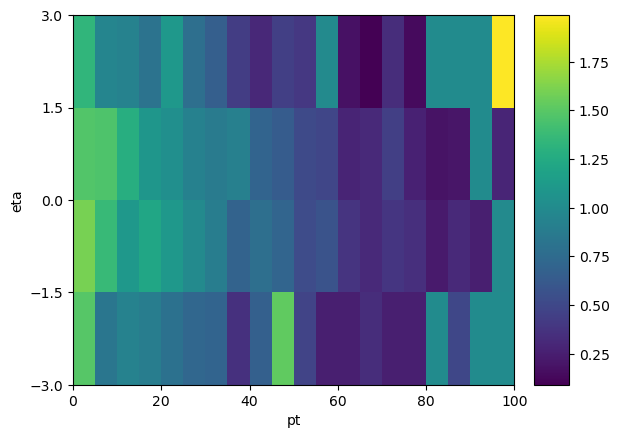

In [148]:
edge = [ax.edges for ax in h.axes[1:]] #get the y-axis and x-axis (z-axis is the 0th element of axes array)
print(edge)
corr = dense_lookup(sf, edge) #corr is the correction histogram; its basically a lookup table
print(corr)
sfhist = hist.Hist(*h.axes[1:], data=sf) #Steal the axes from h
sfhist.plot2d()

- Lets generate a mock data which looks as if from gen 2 and then correct it with corr

In [149]:
ptvals = np.random.exponential(scale=10.0, size=10000) + np.random.exponential(scale=15.0, size=10000)
etavals = np.random.normal(scale=1.1, size=10000)

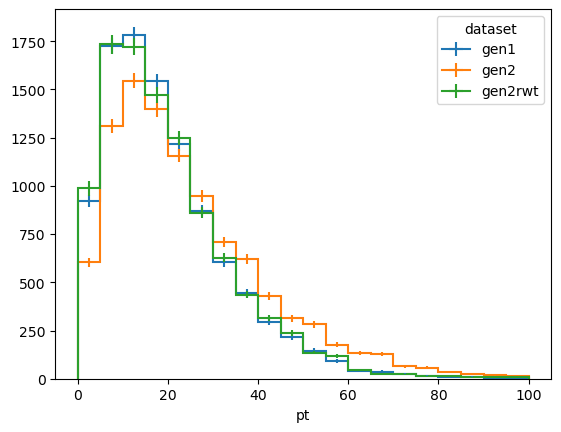

In [150]:
h.fill(
    dataset="gen2rwt",
    pt=ptvals,
    eta=etavals,
    weight=corr(ptvals, etavals)
)

fig, ax = plt.subplots()
h[:, :, sum].plot1d(ax=ax)
ax.legend(title="dataset")

- The agreement between gen1 and gen2rwt shows that the correction has been made

### CMS high-level tools

#### Applying energy scale transformations with jetmet_tools

<u>chatGPT <u>: 

In particle physics, specifically in the context of high-energy particle collisions and experiments conducted at accelerators like the Large Hadron Collider (LHC) at CERN, "AK4" and "AK8" refer to jet clustering algorithms with different cone sizes. Let's break down what this means:

Jet Clustering Algorithm:
In a high-energy particle collision, quarks and gluons are produced as a result of the collision. However, these particles are not observed directly due to a phenomenon called color confinement. Instead, they rapidly combine to form groups of particles known as jets. Jet clustering algorithms are used to group particles that come from the same initial quark or gluon into these jets.

AK4 and AK8:

AK4: This refers to the "Anti-kT with radius 0.4" jet clustering algorithm. The "Anti-kT" part indicates the algorithm's strategy for clustering, and "0.4" represents the size of the jet cone in terms of angular separation. The angular separation is usually measured in units of ΔR, which stands for the difference in rapidity and azimuthal angle. Smaller cone sizes (like 0.4) tend to capture the more collimated, high-energy particles, such as those coming from quarks produced in processes like the strong force.

AK8: This stands for "Anti-kT with radius 0.8" jet clustering algorithm. Similar to AK4, it uses the Anti-kT strategy for clustering, but with a larger cone size of 0.8. Larger cone sizes tend to capture more of the softer, wider-angle particles, which might arise from the decay of heavy particles like W and Z bosons, top quarks, and even hypothetical new particles.

The "Anti-kT" algorithm is a popular choice for jet clustering because it tends to give well-behaved jets that are less sensitive to the presence of additional particles (pileup) in the collision. The "radius" or cone size determines how tightly or broadly the algorithm clusters particles. Smaller cone sizes are more focused and suitable for high-energy quarks, while larger cone sizes are better for reconstructing the broader structure of heavier particles.

These jet clustering algorithms are essential tools for particle physicists to analyze the outcomes of high-energy collisions and to identify and understand the particles produced in these collisions.

In [151]:
from coffea.jetmet_tools import FactorizedJetCorrector, JetCorrectionUncertainty
from coffea.jetmet_tools import JECStack, CorrectedJetsFactory

In [152]:
ext = extractor()
ext.add_weight_sets([
    "* * data/Fall17_17Nov2017_V32_MC_L2Relative_AK4PFPuppi.jec.txt",
    "* * data/Fall17_17Nov2017_V32_MC_Uncertainty_AK4PFPuppi.junc.txt",
])
ext.finalize()

- Stars probably represents that, we used the filename as the key and identifier name.

In [153]:
jec_stack_names = [
    "Fall17_17Nov2017_V32_MC_L2Relative_AK4PFPuppi",
    "Fall17_17Nov2017_V32_MC_Uncertainty_AK4PFPuppi"
]

evaluator = ext.make_evaluator()

jec_inputs = {name: evaluator[name] for name in jec_stack_names}
jec_stack = JECStack(jec_inputs) # Takes a dictionary as an input

In [154]:
print(jec_inputs)
print(dir(evaluator))

{'Fall17_17Nov2017_V32_MC_L2Relative_AK4PFPuppi': binned dims: ['JetEta', 'JetPt']
eval vars  : ['JetPt']
parameters : ['p0', 'p1', 'p2', 'p3', 'p4']
formula    : max(0.0001,p0+((JetPt-p1)*(p2+((JetPt-p1)*(p3+((JetPt-p1)*p4))))))
signature  : (JetEta,JetPt)
, 'Fall17_17Nov2017_V32_MC_Uncertainty_AK4PFPuppi': binned dims   : ['JetEta']
eval vars     : ['JetPt']
signature     : (JetEta,JetPt)
}
['Fall17_17Nov2017_V32_MC_L2Relative_AK4PFPuppi', 'Fall17_17Nov2017_V32_MC_Uncertainty_AK4PFPuppi']


AS IS(I didn't understand): 
Now we prepare some auxilary variables that are used to parameterize the jet energy corrections, such as jet area, mass, and event $\rho$ (mean pileup energy density), and pass all of these into the `CorrectedJetsFactory`:

In [155]:
name_map = jec_stack.blank_name_map
name_map['JetPt'] = 'pt'
name_map['JetMass'] = 'mass'
name_map['JetEta'] = 'eta'
name_map['JetA'] = 'area'

jets = events.Jet
    
jets['pt_raw'] = (1 - jets['rawFactor']) * jets['pt']
jets['mass_raw'] = (1 - jets['rawFactor']) * jets['mass']
jets['pt_gen'] = ak.values_astype(ak.fill_none(jets.matched_gen.pt, 0), np.float32)
jets['rho'] = ak.broadcast_arrays(events.fixedGridRhoFastjetAll, jets.pt)[0]
name_map['ptGenJet'] = 'pt_gen'
name_map['ptRaw'] = 'pt_raw'
name_map['massRaw'] = 'mass_raw'
name_map['Rho'] = 'rho'
    
events_cache = events.caches[0]
corrector = FactorizedJetCorrector(
    Fall17_17Nov2017_V32_MC_L2Relative_AK4PFPuppi=evaluator['Fall17_17Nov2017_V32_MC_L2Relative_AK4PFPuppi'],
)
uncertainties = JetCorrectionUncertainty(
    Fall17_17Nov2017_V32_MC_Uncertainty_AK4PFPuppi=evaluator['Fall17_17Nov2017_V32_MC_Uncertainty_AK4PFPuppi']
)

jet_factory = CorrectedJetsFactory(name_map, jec_stack)
corrected_jets = jet_factory.build(jets, lazy_cache=events_cache)

print('starting columns:', set(ak.fields(jets)))
print('new columns:', set(ak.fields(corrected_jets)) - set(ak.fields(jets)))

starting columns: {'pt', 'nConstituents', 'electronIdxG', 'chHEF', 'rawFactor', 'muonIdx2', 'genJetIdx', 'electronIdx1G', 'muonIdx1G', 'pt_raw', 'muonIdx2G', 'genJetIdxG', 'electronIdx1', 'mass', 'hadronFlavour', 'btagDeepB', 'nMuons', 'muonIdxG', 'phi', 'electronIdx2G', 'eta', 'bRegCorr', 'jetId', 'chEmEF', 'jercCHF', 'muEF', 'cleanmask', 'btagDeepFlavC', 'neHEF', 'qgl', 'btagDeepC', 'btagCMVA', 'puId', 'partonFlavour', 'pt_gen', 'rho', 'muonIdx1', 'muonSubtrFactor', 'area', 'neEmEF', 'nElectrons', 'jercCHPUF', 'btagCSVV2', 'mass_raw', 'electronIdx2', 'bRegRes', 'btagDeepFlavB'}
new columns: {'pt_orig', 'pt_jec', 'jet_energy_uncertainty_jes', 'jet_energy_correction', 'mass_jec', 'mass_orig', 'JES_jes'}


Below we show that the corrected jets indeed have a different $p_T$ and mass than we started with

In [156]:
print('untransformed pt ratios', jets.pt/jets.pt_raw)
print('untransformed mass ratios', jets.mass/jets.mass_raw)

print('transformed pt ratios', corrected_jets.pt/corrected_jets.pt_raw)
print('transformed mass ratios', corrected_jets.mass/corrected_jets.mass_raw)

print('JES UP pt ratio', corrected_jets.JES_jes.up.pt/corrected_jets.pt_raw)
print('JES DOWN pt ratio', corrected_jets.JES_jes.down.pt/corrected_jets.pt_raw)

untransformed pt ratios [[1.12, 1.09, 1.2, 1.35, 1.27], [1.03, ... 1.28, 1.1, 1.13, 0.989], [1.13, 0.978]]
untransformed mass ratios [[1.12, 1.09, 1.2, 1.35, 1.27], [1.03, ... 1.28, 1.1, 1.13, 0.989], [1.13, 0.978]]
transformed pt ratios [[1.2, 1.3, 1.46, 2.09, 2.1], [1.09, 1.29, ... 1.84, 1.47, 1.36, 1.16], [1.37, 1.15]]
transformed mass ratios [[1.2, 1.3, 1.46, 2.09, 2.1], [1.09, 1.29, ... 1.84, 1.47, 1.36, 1.16], [1.37, 1.15]]
JES UP pt ratio [[1.22, 1.35, 1.56, 2.34, 2.37], [1.1, ... 2.07, 1.52, 1.41, 1.2], [1.41, 1.17]]
JES DOWN pt ratio [[1.19, 1.25, 1.35, 1.83, 1.83], [1.08, ... 1.6, 1.41, 1.32, 1.13], [1.33, 1.12]]


#### Applying CMS b-tagging corrections with btag_tools
The `coffea.btag_tools` module provides the high-level utility [BTagScaleFactor](https://coffeateam.github.io/coffea/api/coffea.btag_tools.BTagScaleFactor.html#coffea.btag_tools.BTagScaleFactor) which calculates per-jet weights for b-tagging as well as light flavor mis-tagging efficiencies. Uncertainties can be calculated as well.

In [157]:
from coffea.btag_tools import BTagScaleFactor

btag_sf = BTagScaleFactor("data/DeepCSV_102XSF_V1.btag.csv.gz", "medium")

print("SF:", btag_sf.eval("central", events.Jet.hadronFlavour, abs(events.Jet.eta), events.Jet.pt))
print("systematic +:", btag_sf.eval("up", events.Jet.hadronFlavour, abs(events.Jet.eta), events.Jet.pt))
print("systematic -:", btag_sf.eval("down", events.Jet.hadronFlavour, abs(events.Jet.eta), events.Jet.pt))

SF: [[1.52, 1.56, 1.59, 1.6, 1.6], [0.969, 1.57, ... 1.59, 1.6, 1.6, 1.6], [1.6, 1.6]]
systematic +: [[1.72, 1.77, 1.79, 1.8, 1.8], [1.01, 1.78, ... 1.8, 1.8, 1.8, 1.8], [1.8, 1.8]]
systematic -: [[1.31, 1.36, 1.38, 1.4, 1.4], [0.925, 1.37, ... 1.39, 1.4, 1.4, 1.4], [1.4, 1.4]]


### Using Correctionlib

Correction library object can be constructed from the corrections we make earlier and save it in json format.

- correctionlib helps to handle json files in hep style
- rich is a library which enables colourful printing in terminal

In [158]:
import correctionlib, rich
import correctionlib.convert

In [159]:
# without a name, the resulting object will fail validation
sfhist.name = "gen2_to_gen1"
sfhist.label = "out"
clibcorr = correctionlib.convert.from_histogram(sfhist)
clibcorr.description = "Reweights gen2 to agree with gen1"
# set overflow bins behavior (default is to raise an error when out of bounds)
clibcorr.data.flow = "clamp"

cset = correctionlib.schemav2.CorrectionSet(
    schema_version=2,
    description="my custom corrections",
    corrections=[clibcorr],
)
rich.print(cset)

with open("data/mycorrections.json", "w") as fout:
    fout.write(cset.json(exclude_unset=True))

CorrectionSet (schema v2)
my custom corrections
📂
└── 📈 gen2_to_gen1 (v0)
    Reweights gen2 to agree with gen1
    Node counts: MultiBinning: 1
    ╭──────────── ▶ input ─────────────╮ ╭──────────── ▶ input ────────────╮
    │ pt (real)                        │ │ eta (real)                      │
    │ pt                               │ │ eta                             │
    │ Range: [0.0, 100.0), overflow ok │ │ Range: [-3.0, 3.0), overflow ok │
    ╰──────────────────────────────────╯ ╰─────────────────────────────────╯
    ╭─── ◀ output ───╮
    │ out (real)     │
    │ No description │
    ╰────────────────╯

In [160]:
ceval = cset.to_evaluator()

ceval["gen2_to_gen1"].evaluate(ptvals, etavals)

array([1.60329406, 0.98966165, 0.81182546, ..., 0.69209332, 1.60329406,
       0.88535561])

In [161]:
def myJetSF(jets):
    j, nj = ak.flatten(jets), ak.num(jets)
    sf = ceval["gen2_to_gen1"].evaluate(np.array(j.pt), np.array(j.eta))
    return ak.unflatten(sf, nj)

myJetSF(events.Jet)

<Array [[1, 0.442, 0.778, ... [0.885, 1.09]] type='40 * var * float64'>

- Pydantic versions mismatched in my device and coffea casa
- My device has ver 2 , coffea-casa at Nebraska has ver 1

## Analysis tools and Accumulators

- Accumulators relate to the eventual output of an analysis which is usually the output of coffea processors.

In [163]:
#Lets load a sample file
import numpy as np
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
fname = "data/nano_dy.root"
events = NanoEventsFactory.from_root(
    fname,
    schemaclass=NanoAODSchema.v6,
    metadata={"dataset":"DYJets"},
).events()

In [166]:
# lets also load a correction table
from coffea.lookup_tools import extractor
ext = extractor()
ext.add_weight_sets(["* * data/testSF2d.histo.root"])
ext.finalize()
evaluator = ext.make_evaluator()
evaluator.keys()

dict_keys(['scalefactors_Tight_Electron', 'scalefactors_Tight_Electron_error'])

### Weights